### Imports


In [1]:
from main_functions import *
from plots import *

### Loading the dataset


In [2]:
df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [3]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [4]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

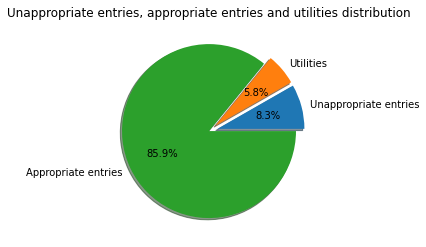

In [5]:
# Show how much of the raw data is neither unappropriate nor utilities
plot_unappropriate_entries()

### Removing the inappropriate games


In [6]:
# Filter out rows that contain inappropriate words in the specified columns
df_filtered = df[~df.apply(contains_inappropriate_word, axis=1)]
df = df_filtered
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


### Plots


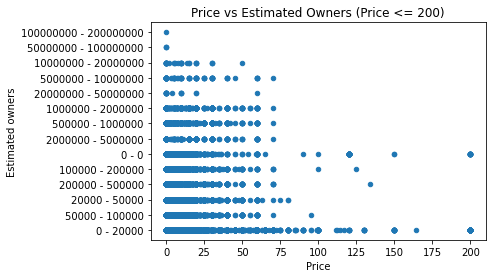

In [7]:
# Filter the data to zoom in on Price <= 200
df_filtered = df[df["Price"] <= 200]

# Plot the scatter plot for Price vs Estimated Owners (Price <= 200)
df_filtered.plot(
    kind="scatter",
    x="Price",
    y="Estimated owners",
    title="Price vs Estimated Owners (Price <= 200)",
)
plt.show()

In [8]:
# Summary statistics for Price
price_summary = df["Price"].describe()
print(price_summary)

count    77626.000000
mean         7.039582
std         11.948244
min          0.000000
25%          0.990000
50%          4.240000
75%          9.990000
max        999.980000
Name: Price, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


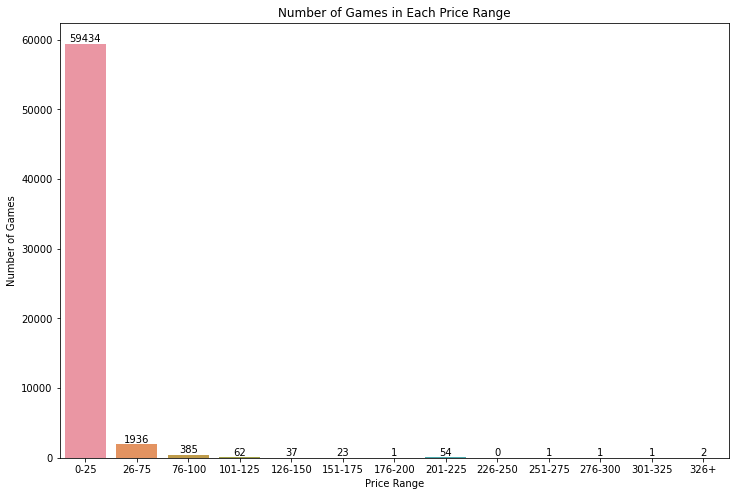

In [9]:
# Show plot for price range
plot_price_range(df)

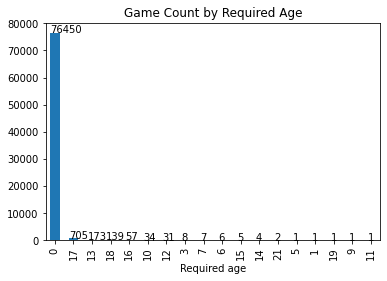

In [10]:
# Create the bar plot for the distribution of games by Required age
ax = (
    df["Required age"]
    .value_counts()
    .plot(kind="bar", title="Game Count by Required Age")
)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

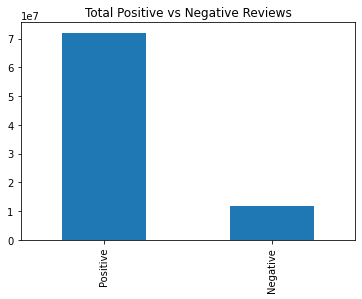

In [10]:
# Bar chart for positive and negative reviews
df[["Positive", "Negative"]].sum().plot(
    kind="bar", title="Total Positive vs Negative Reviews"
)
plt.show()

ValueError: Format ' average playtime forever' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

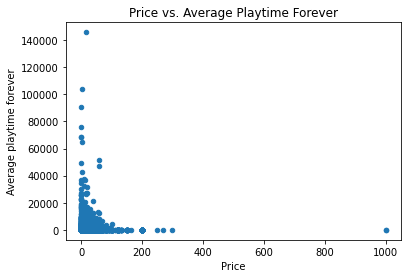

In [11]:
# Scatter plot for Price vs. Average playtime forever
plot_price_scatter(df, "Price vs. Average Playtime Forever")

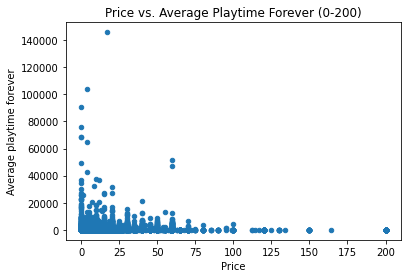

In [13]:
# Filter to zoom in on Price range between 0 and 200
df_filtered = df[df["Price"] <= 200]
plot_price_scatter(df_filtered, "Price vs. Average Playtime Forever (0-200)")

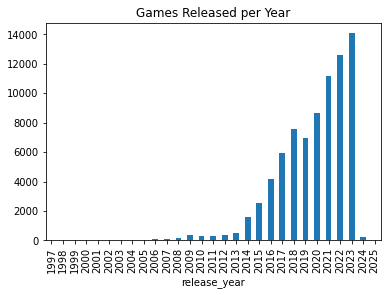

In [14]:
# Plot the number of games released per year
df["release_year"] = df["Release date"].str.extract(r"(\d{4})").astype(int)
df["release_year"].value_counts().sort_index().plot(
    kind="bar", title="Games Released per Year"
)
plt.savefig("games_per_year.png", dpi=300, bbox_inches="tight")
plt.show()

In [15]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

AppID                             0
Name                              5
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3548
Supported languages               0
Full audio languages              0
Reviews                       68457
Header image                      0
Website                       40908
Support url                   39155
Support email                 12508
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                73960
User score                        0
Positive                          0
Negative                          0
Score rank                    77623
Achievements                      0
Recommendations                   0
Notes                       

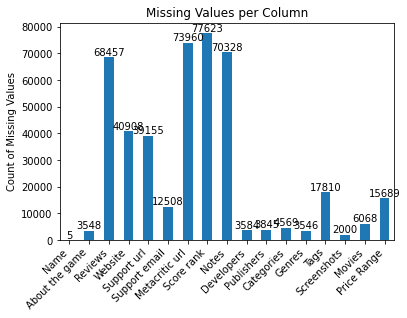

In [16]:
# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(12, 8))
# Plot the missing values
ax = missing_values.plot(
    kind="bar", title="Missing Values per Column", ylabel="Count of Missing Values"
)
plt.xticks(rotation=45, ha="right")

# Annotate each bar with the number of missing values
for i, v in enumerate(missing_values):
    ax.text(i, v + 0.5, str(v), ha="center", va="bottom")

plt.savefig("missingvalues.png", dpi=300, bbox_inches="tight")
plt.show()

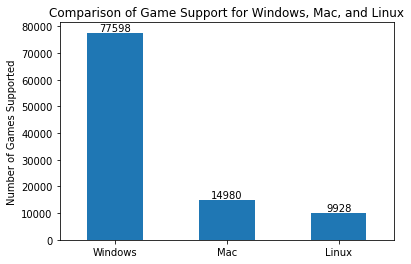

In [17]:
# Plot bar chart for operating systems support
plot_os_support(df)

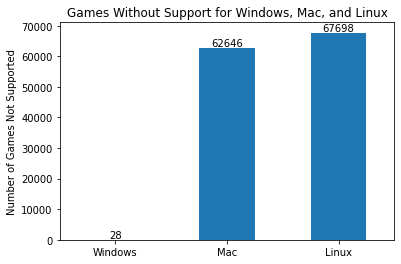

In [18]:
# Plot bar chart to see how much data do not support each os
plot_os_no_support(df)

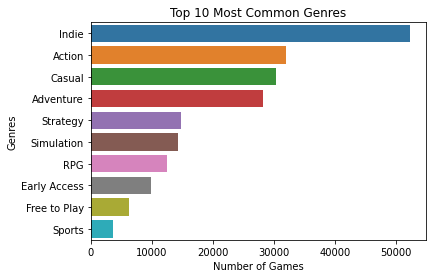

In [19]:
df["Genres"] = df["Genres"].fillna("")
# Plot 10 most common genres
plot_genres(df)

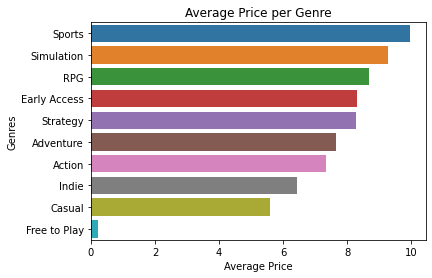

In [20]:
# Plot genre and their average price
plot_genre_price(df)

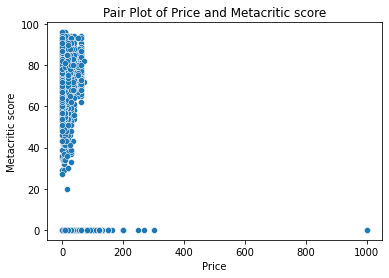

In [21]:
# Pair plot to explore relationships between Price and metacritic score
sns.scatterplot(data=df[df["Price"] <= 200], x="Price", y="Metacritic score")
plt.title("Pair Plot of Price and Metacritic score")
plt.savefig("score_price_under_200.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# Pair plot to explore relationships between Price and metacritic score
sns.scatterplot(data=df, x="Price", y="Metacritic score")
plt.title("Pair Plot of Price and Metacritic score")
plt.savefig("score_price_under_200.png", dpi=300, bbox_inches="tight")
plt.savefig("score_price_all.png", dpi=300, bbox_inches="tight")
plt.show()

### Removing NaN values


In [23]:
df = handle_missing_values(df)
df.isnull().values.any()

True

In [24]:
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Price Range,release_year
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,Perpetual FX Creative,Selfpublished,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2008
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2017
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,Campião Games,Selfpublished,Single-player,"Action,Adventure,Indie,Strategy",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2021
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Selfpublished,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2020
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,7Road,Selfpublished,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2021


In [25]:
print(df.shape)

(73931, 41)


### Removing rows that are not games


In [26]:
# Remove any entries that are not games (like Utilities)
df = remove_non_games(df)
df.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Price Range,release_year
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,Perpetual FX Creative,Selfpublished,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2008
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2017
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,Campião Games,Selfpublished,Single-player,"Action,Adventure,Indie,Strategy",,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2021
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,Odd Critter Games,Selfpublished,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,0-25,2020
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,7Road,Selfpublished,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,NaN,2021


In [27]:
print(df.shape)

(72360, 41)


In [28]:
# storing id in a separate dataframe to use later for merging after clustering
id_df = df[["AppID"]]
id_df.head(5)

,AppID
0,20200
1,655370
2,1732930
3,1355720
5,1469160


In [29]:
print(id_df.shape)

(72360, 1)


### Droping the columns


In [30]:
df_before_dropping = (
    df.copy()
)  # save df before dropping to use later for merging after clustering
columns_to_drop = [
    "AppID",
    "Full audio languages",
    "Header image",
    "Website",
    "Support url",
    "Support email",
    "Metacritic url",
    "Score rank",
    "Achievements",
    "Screenshots",
    "Movies",
]
df = df.drop(columns=columns_to_drop, errors="ignore")
print(df.shape, id_df.shape)

(72360, 30) (72360, 1)


In [31]:
df.head(5)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Reviews,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Price Range,release_year
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],,...,0,0,0,Perpetual FX Creative,Selfpublished,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",0-25,2008
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",0-25,2017
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",,...,0,0,0,Campião Games,Selfpublished,Single-player,"Action,Adventure,Indie,Strategy",,0-25,2021
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",,...,0,0,0,Odd Critter Games,Selfpublished,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",0-25,2020
5,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,Feel tired of auto-fight? Feel tired of boring...,['English'],,...,0,0,0,7Road,Selfpublished,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",NaN,2021


### Categorical to numerical


In [32]:
# Show the data types of the columns
df.dtypes

Name                            object
Release date                    object
Estimated owners                object
Peak CCU                         int64
Required age                     int64
Price                          float64
DLC count                        int64
About the game                  object
Supported languages             object
Reviews                         object
Windows                           bool
Mac                               bool
Linux                             bool
Metacritic score                 int64
User score                       int64
Positive                         int64
Negative                         int64
Recommendations                  int64
Notes                           object
Average playtime forever         int64
Average playtime two weeks       int64
Median playtime forever          int64
Median playtime two weeks        int64
Developers                      object
Publishers                      object
Categories               

In [33]:
df = add_release_season_column(df)
df = convert_estimated_owners_to_midpoints(df)
df = add_review_columns(df)
df = add_online_offline_column(df)
df = add_player_type_numeric_column(df)

In [34]:
print(df.shape, id_df.shape)

(72360, 37) (72360, 1)


### Plots about new columns


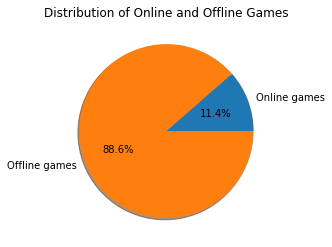

In [35]:
# Plot pie chart to see the distribution of online and offline games
plot_pie_game_type(df)

### Removing the outliers


In [36]:
n_neighbors = 20
df, id_df = remove_outliers(df, id_df)
print(df.shape, id_df.shape)

(64454, 37) (64454, 1)


In [ ]:
plot_price_scatter(
    df[df["Price"] <= 200],
    "Price vs. Average Playtime Forever (0-200) after removing outliers",
)

### Scaling


In [37]:
# Scale data using minmax
df = df.drop(columns=["release_season_num"])
df = scaling(df.select_dtypes(include=["number"]), "minmax")
print(df.shape, id_df.shape)

(64454, 19) (64454, 1)


In [38]:
df.head(5)

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,0.0,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,0.0,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,0.0,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333


In [39]:
id_df

,AppID
0,20200
1,655370
2,1732930
3,1355720
8,1178150
...,...
85098,2669080
85099,2736910
85100,2743220
85101,2293130


### Correlation plot


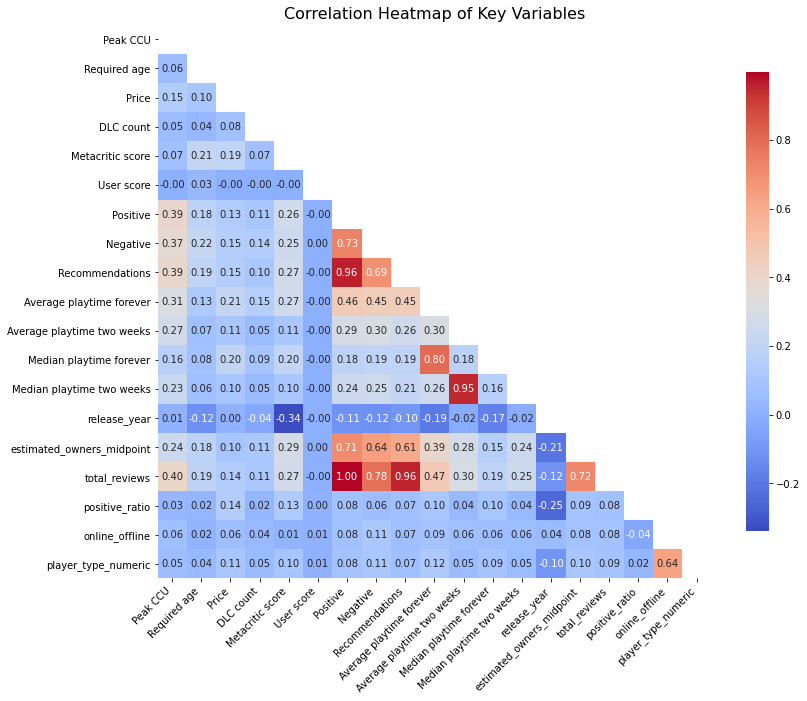

In [40]:
# Correlation plot
plot_corr(df)

### PCA


In [41]:
pca, loadings = implement_PCA(df, df[df.columns[1:]].columns)
print(pca)

Selected features: Index(['Required age', 'Price', 'DLC count', 'Metacritic score', 'User score',
       'Positive', 'Negative', 'Recommendations', 'Average playtime forever',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'release_year',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric'],
      dtype='object')
Explained variance ratio: [0.39385245 0.3804849  0.0929289  0.0716895 ]
Cumulative explained variance ratio: [0.39385245 0.77433735 0.86726624 0.93895574]
[[-0.28154535  0.07296999  0.36588401  0.44099334]
 [ 0.34669801  0.0276093  -0.05956655 -0.01195914]
 [-0.42601532 -0.46793497  0.00689633 -0.01496802]
 ...
 [-0.43348553 -0.47372457 -0.02188462 -0.00987993]
 [-0.43329116 -0.47333366 -0.02107512 -0.01018377]
 [-0.43299888 -0.47274583 -0.01985783 -0.01064067]]


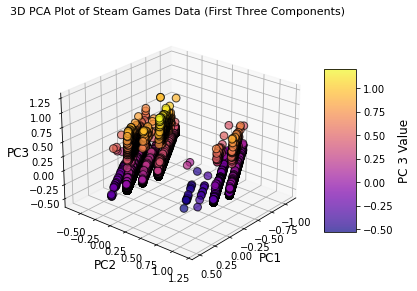

In [42]:
# Show PCA plot
plot_PCA(pca)

In [43]:
print(pca.shape, id_df.shape)

(64454, 4) (64454, 1)


In [44]:
# Show how much each feature contributes to each pca component
print(loadings)

     Required age     Price  DLC count  Metacritic score  User score  \
PC1      0.003460  0.009742  -0.000047          0.051348   -0.000047   
PC2      0.011994  0.019593   0.000852          0.069233    0.000113   
PC3      0.132086  0.040574   0.002109          0.792260    0.000007   
PC4     -0.085030 -0.015229  -0.001023         -0.519879   -0.000042   

     Positive  Negative  Recommendations  Average playtime forever  \
PC1  0.001072 -0.000321         0.001108                  0.003245   
PC2  0.004996  0.005573         0.004634                  0.012650   
PC3  0.017974  0.016467         0.018486                  0.039687   
PC4 -0.013351 -0.012435        -0.013821                 -0.021230   

     Average playtime two weeks  Median playtime forever  \
PC1                    0.000027                 0.003688   
PC2                    0.001957                 0.009670   
PC3                    0.003877                 0.029008   
PC4                   -0.003848                -

In [45]:
# See which feature had the most influence in each pca component
print(loadings.abs().idxmax(axis=1))

PC1         positive_ratio
PC2         online_offline
PC3       Metacritic score
PC4    player_type_numeric
dtype: object


### Clustering


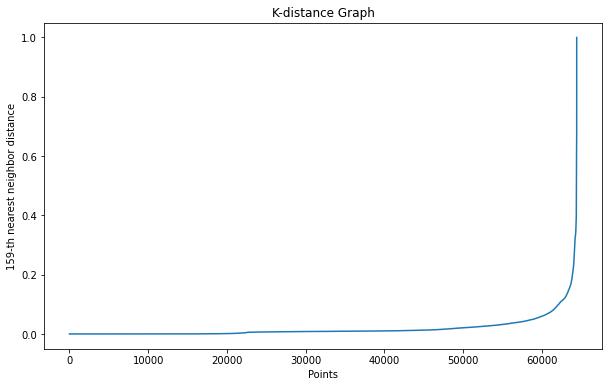

In [46]:
# Plot k-distance graph
distances = elbow_plot(pca, k=159)

In [47]:
# Choose the best value for epsilon for DBSCAN clustering
optimal_eps = choose_best_eps(distances)

Optimal value for epsilon: 0.33


In [48]:
db_labels = implement_DBSCAN(pca, optimal_eps)
print(db_labels)

[0 0 0 ... 0 0 0]


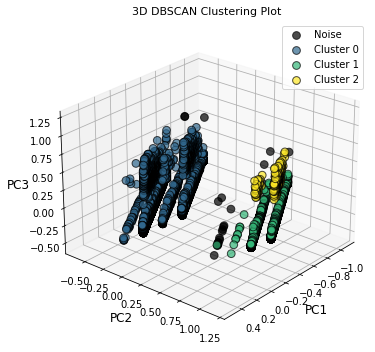

In [49]:
plot_dbscan(pca, db_labels)

In [50]:
# Add the cluster labels to the original DataFrame
df["Cluster"] = db_labels
cluster_means = df.groupby(
    "Cluster"
).mean()  # Calculate the mean of each feature for each cluster

In [51]:
cluster_means

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric
Cluster,,,,,,,,,,,,,,,,,,,
-1,0.000002,0.035197,0.010864,0.000449,0.304348,0.000000,0.000700,0.003505,0.000247,0.030442,0.000000,0.046984,0.000000,0.742236,0.003329,0.001119,0.436734,0.869565,0.231884
0,0.000506,0.010780,0.033697,0.000442,0.038779,0.000000,0.001092,0.001151,0.001078,0.004867,0.000324,0.004993,0.000359,0.803787,0.001662,0.001204,0.612179,0.000000,0.397905
1,0.002727,0.010877,0.038832,0.000855,0.000116,0.000145,0.002642,0.003906,0.002333,0.008714,0.001338,0.007943,0.001513,0.826006,0.003388,0.003053,0.553620,1.000000,0.889773
2,0.020029,0.087338,0.099190,0.005696,0.773690,0.000000,0.035209,0.041098,0.033837,0.073368,0.014065,0.043163,0.015556,0.704822,0.032651,0.039317,0.793808,1.000000,0.962366


In [52]:
cluster_scores = scoring_clusters(cluster_means)
print(
    cluster_scores
)  # Cluster 2 has a better score which means this cluster may have the niche we are looking for, so we continue with analyzing this cluster

[1, 1, 1, 10]


In [53]:
print(pca.shape, id_df.shape, df.shape)

(64454, 4) (64454, 1) (64454, 20)


In [54]:
# add id back to the df
df["AppID"] = id_df["AppID"].to_numpy()
df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,...,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster,AppID
0,0.000000,0.0,0.099955,0.0,0.0,0.0,0.000014,0.000193,0.0,0.0,...,0.0,0.0,0.392857,0.000286,0.000037,0.352941,0.0,1.000000,0,20200
1,0.000000,0.0,0.004950,0.0,0.0,0.0,0.000120,0.000088,0.0,0.0,...,0.0,0.0,0.714286,0.000286,0.000128,0.913793,0.0,0.333333,0,655370
2,0.000000,0.0,0.024951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.857143,0.000286,0.000000,0.000000,0.0,0.333333,0,1732930
3,0.000000,0.0,0.029951,0.0,0.0,0.0,0.000007,0.000000,0.0,0.0,...,0.0,0.0,0.821429,0.000286,0.000007,1.000000,0.0,0.333333,0,1355720
8,0.000015,0.0,0.074954,0.0,0.0,0.0,0.000172,0.000105,0.0,0.0,...,0.0,0.0,0.821429,0.000286,0.000180,0.926829,0.0,0.333333,0,1178150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2669080
85099,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2736910
85100,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2743220
85101,0.000000,0.0,0.019951,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.964286,0.000000,0.000000,0.000000,0.0,0.333333,0,2293130


In [55]:
# store the cluster 2 data in a seperate dataframe
cluster_2_df = df[df["Cluster"] == 2]
cluster_2_df

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Recommendations,Average playtime forever,...,Median playtime forever,Median playtime two weeks,release_year,estimated_owners_midpoint,total_reviews,positive_ratio,online_offline,player_type_numeric,Cluster,AppID
119,0.000650,0.0,0.081204,0.025074,0.906250,0.0,0.004778,0.001944,0.005376,0.013017,...,0.023503,0.000000,0.857143,0.002143,0.004879,0.949977,1.0,1.0,2,1345820
174,0.000059,0.0,0.064953,0.000000,0.791667,0.0,0.000752,0.000578,0.000854,0.015605,...,0.017146,0.000000,0.785714,0.000286,0.000803,0.909589,1.0,1.0,2,761910
208,0.000251,0.0,0.149957,0.013274,0.750000,0.0,0.002040,0.002207,0.001980,0.031286,...,0.034376,0.000000,0.821429,0.001000,0.002256,0.877193,1.0,1.0,2,1089830
416,0.000030,0.0,0.099955,0.000000,0.708333,0.0,0.001487,0.005202,0.001686,0.014235,...,0.018652,0.000000,0.678571,0.010000,0.002095,0.688353,1.0,1.0,2,299480
777,0.000000,0.0,0.024951,0.000000,0.781250,0.0,0.000331,0.001349,0.000000,0.012408,...,0.020743,0.000000,0.464286,0.004286,0.000490,0.654709,1.0,1.0,2,40420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78085,0.000000,0.0,0.000000,0.000000,0.656250,0.0,0.000864,0.002872,0.000312,0.011951,...,0.026347,0.000000,0.750000,0.002143,0.001198,0.699083,1.0,1.0,2,469830
78151,0.000000,0.0,0.000000,0.000000,0.718750,0.0,0.013581,0.064700,0.008875,0.032427,...,0.015557,0.000000,0.678571,0.042857,0.021297,0.618625,1.0,1.0,2,394230
78623,0.000473,0.0,0.099955,0.001475,0.854167,0.0,0.000437,0.001121,0.000603,0.000000,...,0.000000,0.000000,0.928571,0.001000,0.000565,0.750973,1.0,1.0,2,1346020
81819,0.002748,0.0,0.124956,0.004425,0.812500,0.0,0.001675,0.002014,0.002090,0.116008,...,0.127467,0.013917,0.928571,0.002143,0.001878,0.865340,1.0,1.0,2,1599330


In [56]:
# merge cluster 2 with df based on AppID to get other features for cluster 2
cluster_2_df = cluster_2_df.merge(
    df_before_dropping, how="inner", on="AppID", suffixes=("_cluster", "_original")
)
print(cluster_2_df.columns)

Index(['Peak CCU_cluster', 'Required age_cluster', 'Price_cluster',
       'DLC count_cluster', 'Metacritic score_cluster', 'User score_cluster',
       'Positive_cluster', 'Negative_cluster', 'Recommendations_cluster',
       'Average playtime forever_cluster',
       'Average playtime two weeks_cluster', 'Median playtime forever_cluster',
       'Median playtime two weeks_cluster', 'release_year_cluster',
       'estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric', 'Cluster', 'AppID', 'Name',
       'Release date', 'Estimated owners', 'Peak CCU_original',
       'Required age_original', 'Price_original', 'DLC count_original',
       'About the game', 'Supported languages', 'Full audio languages',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score_original',
       'Metacritic url', 'User score_original', 'Positive_original',
       'Negative_original

In [57]:
# Drop the duplicated columns
columns_to_drop = [col for col in cluster_2_df.columns if col.endswith("_cluster")]
cluster_2_df = cluster_2_df.drop(columns=columns_to_drop)
cluster_2_df.columns

Index(['estimated_owners_midpoint', 'total_reviews', 'positive_ratio',
       'online_offline', 'player_type_numeric', 'Cluster', 'AppID', 'Name',
       'Release date', 'Estimated owners', 'Peak CCU_original',
       'Required age_original', 'Price_original', 'DLC count_original',
       'About the game', 'Supported languages', 'Full audio languages',
       'Reviews', 'Header image', 'Website', 'Support url', 'Support email',
       'Windows', 'Mac', 'Linux', 'Metacritic score_original',
       'Metacritic url', 'User score_original', 'Positive_original',
       'Negative_original', 'Score rank', 'Achievements',
       'Recommendations_original', 'Notes',
       'Average playtime forever_original',
       'Average playtime two weeks_original',
       'Median playtime forever_original',
       'Median playtime two weeks_original', 'Developers', 'Publishers',
       'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', 'Price Range',
       'release_year_original'],
      dtype='obj

### Plot for Cluster 2


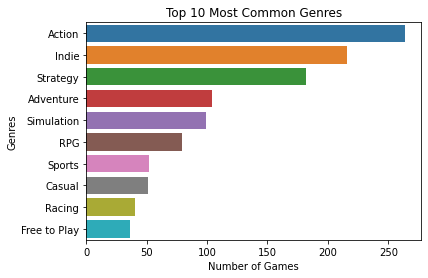

In [58]:
plot_genres(cluster_2_df)

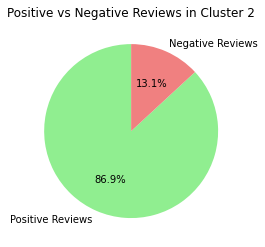

In [59]:
plot_pie_reviews(cluster_2_df)

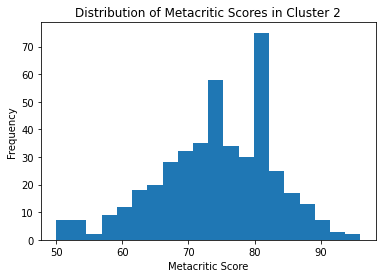

In [60]:
cluster_2_df["Metacritic score_original"].plot(
    kind="hist", bins=20, title="Distribution of Metacritic Scores in Cluster 2"
)
plt.xlabel("Metacritic Score")
plt.savefig("scoredistcluster2", dpi=300, bbox_inches="tight")
plt.show()

Price Range
0-25       269
26-75       99
76-100      19
101-125      0
126-150      0
151-175      0
176-200      0
201-225      0
226-250      0
251-275      0
276-300      0
301-325      0
326+         0
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


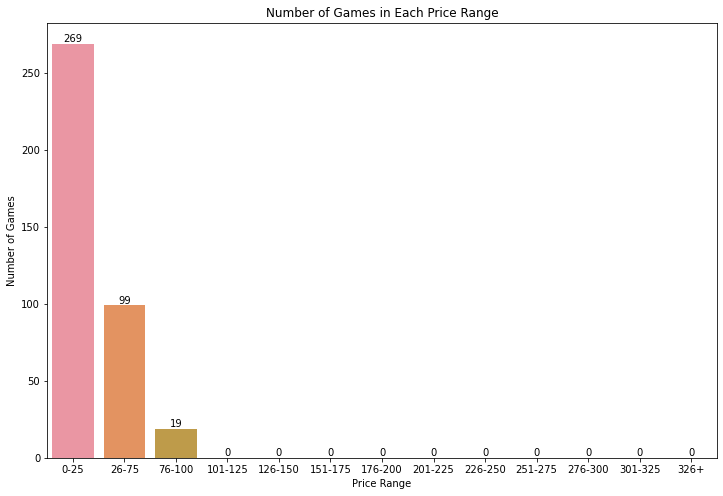

In [61]:
# Price range in cluster 2
plot_price_range(cluster_2_df.rename(columns={"Price_original": "Price"}))

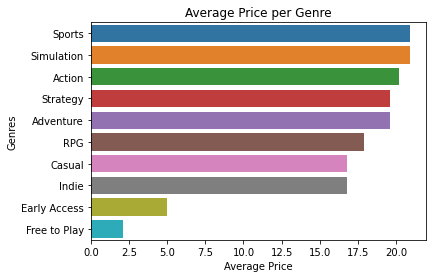

In [62]:
plot_genre_price(cluster_2_df.rename(columns={"Price_original": "Price"}))

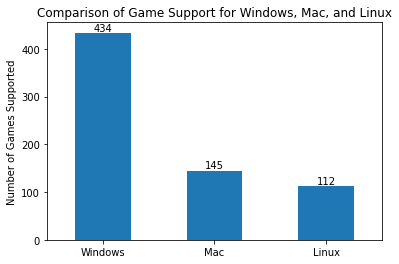

In [63]:
# Bar chart for os support
plot_os_support(cluster_2_df)

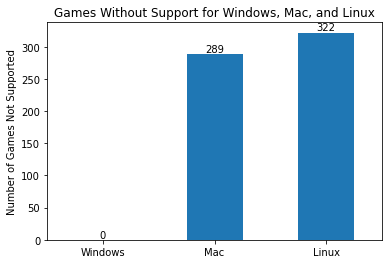

In [64]:
# Bar chart for no os support
plot_os_no_support(cluster_2_df)

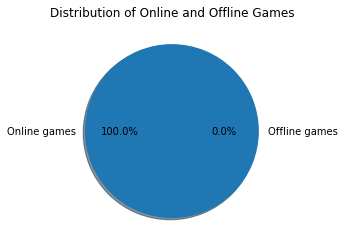

In [65]:
# Check if all games are online
plot_pie_game_type(cluster_2_df)

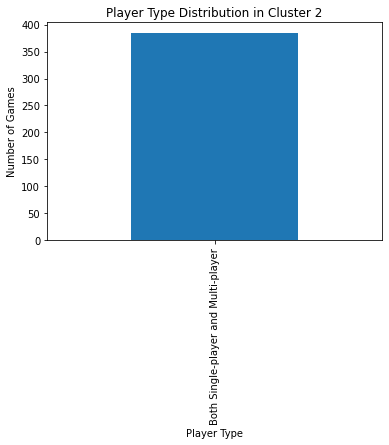

In [66]:
player_type_map = {
    0.33: "Single-player Only",
    0.66: "Multi-player Only",
    1: "Both Single-player and Multi-player",
}
cluster_2_df["player_type_numeric"].map(player_type_map).value_counts().plot(
    kind="bar", title="Player Type Distribution in Cluster 2"
)
plt.xlabel("Player Type")
plt.ylabel("Number of Games")
plt.show()

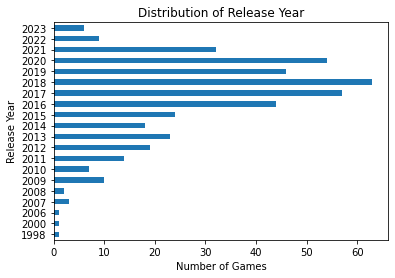

In [67]:
# Count the number of games per release year
plot_year(cluster_2_df.rename(columns={"release_year_original": "release_year"}))

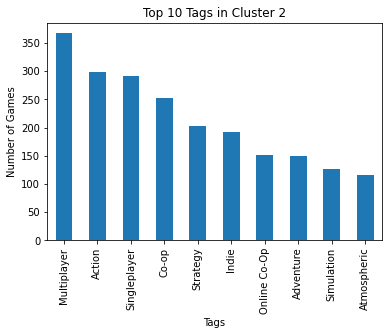

In [68]:
# Bar chart for tags
tags_series = cluster_2_df["Tags"].str.split(",").explode()
tags_series.value_counts().head(10).plot(kind="bar", title="Top 10 Tags in Cluster 2")
plt.xlabel("Tags")
plt.ylabel("Number of Games")
plt.savefig("toptagsclus", dpi=300, bbox_inches="tight")
plt.show()

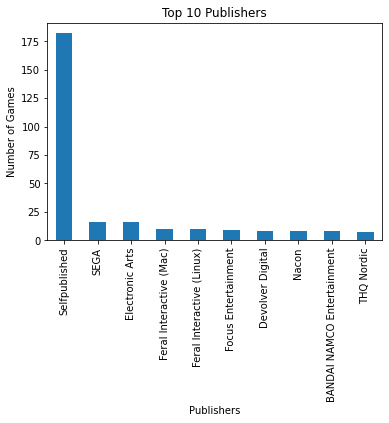

In [69]:
# Count the occurrences of each publisher
plot_publishers(cluster_2_df)